In [144]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model  import LinearRegression  
from sklearn.metrics import mean_squared_error 



## Setting


 `orders` contains the information of 1000 orders placed by the customers. 
* `order_id`:  unique identifier  for an order
* `customer_id`: unique identifier  for a customer 
* `order_date`: when was the order was placed 
* `delivery_date`: when the order was delivered
    

A customer can place multiple orders.

<img src="https://www.sellerexpress.com/wp-content/uploads/2017/09/ecommerce-shopping-sales.gif" alt="Drawing" style="width: 400px;"/>





In [145]:
orders=pd.read_csv("orders.csv")
orders.head(15)


,order_id,customer_id,order_date,delivery_date
0,1,64,2021-8-30,2021-09-24
1,2,473,2021-2-3,2021-02-13
2,3,774,2021-10-8,2021-11-03
3,4,433,2021-5-6,2021-05-19
4,5,441,2021-3-23,2021-03-24
5,6,800,2021-9-9,2021-10-05
6,7,626,2021-4-5,2021-04-11
7,8,58,2021-4-12,2021-05-01
8,9,852,2021-5-1,2021-05-11
9,10,659,2021-10-15,2021-10-16


## Q1. [10 Points]

* Based on the dataset, what is the proportion of orders being placed on a weekend? 

In [146]:
 date = orders.order_date
 dateName = pd.to_datetime (date, format= "%Y-%m-%d").dt.day_name()
 F1 = dateName=='Saturday'
 F2 = dateName=='Sunday'
 prop= len(dateName[F1+F2])/len(date)
 print(prop)
 #306/1000 order placed on weekend 


0.306


## Q2. [15  Points]

Construct the following table:

||Week|NumOfOrders|AvgDeliveryDays|
|---|---|---|---|
|**0**|1|?|??|
|**1**|2|||
|**2**|3||
|**...**|...||

* week 1 is 0-6 days since the earliest days in column `order_date`
* week 2 is 7-13 days since the earliest days of the week 
* ...

? should give the total number of orders placed during this week. 

?? should give the average of (delivery_date-order_date) among all packages placed during the week. It measures the average efficiency of delivery during the week. 	

In [147]:

order_date_dt = pd.to_datetime (orders.order_date, format= "%Y-%m-%d")
delivery_date_dt = pd.to_datetime (orders2.delivery_date, format= "%Y-%m-%d")
startDate = order_date_dt.min()
weekNum = (order_date_dt - startDate).dt.days/7
weekNum = weekNum.astype(int)+1
deliveryTime=(delivery_date_dt-order_date_dt).dt.days
orders2 = orders.assign(numberOfWeek = weekNum, deliveyDays = deliveryTime)

numOfOrders = orders2.groupby("numberOfWeek").size()
AvgDeliveryDays = orders2.groupby("numberOfWeek").sum().deliveyDays/numOfOrders

weekNumber = np.arange (1,len(numOfOrder)+1)
result = pd.DataFrame({"week":weekNumber, "NumOfOrders":numOfOrders, "AvgDeliveryDays":AvgDeliveryDays})
result.reset_index(drop= True, inplace= True)
result

/tmp/ipykernel_34/1728828138.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AvgDeliveryDays = orders2.groupby("numberOfWeek").sum().deliveyDays/numOfOrders


,week,NumOfOrders,AvgDeliveryDays
0,1,28,11.892857
1,2,31,15.548387
2,3,14,11.428571
3,4,23,16.043478
4,5,29,13.827586
5,6,26,11.807692
6,7,21,13.190476
7,8,22,16.545455
8,9,19,13.789474
9,10,29,16.482759


In [148]:
#min




## Q3 [10 Points]

Split the data into two parts:

Week 1- 30: Train the model 

Week 31- end: Validation model performance 

Test which model is the best predictive model using Mean Squared Error measurement:

* Model 1: $AverageDeliveryDays= \beta_0 + \beta_1 NumOfOrders + \epsilon$

* Model 2: $AverageDeliveryDays= \beta_0 + \beta_1 NumOfOrders+\beta_2 Week + \epsilon$

* Model 3: $AverageDeliveryDays= \beta_0 + \beta_1 Week + \epsilon$

In [154]:
 Train = result.iloc[0:29, :]
 Valid = result.iloc[30:, :]

In [155]:
model1 = LinearRegression()
model1.fit(Train[["NumOfOrders"]], Train["AvgDeliveryDays"])

LinearRegression()

In [156]:
model2 = LinearRegression()
model2.fit(Train[["NumOfOrders", "week"]], Train["AvgDeliveryDays"])

LinearRegression()

In [157]:
model3 = LinearRegression()
model3.fit(Train[["week"]], Train["AvgDeliveryDays"])

LinearRegression()

In [158]:
model1_predict = model1.predict(Valid[["NumOfOrders"]])
model2_predict = model2.predict(Valid[["NumOfOrders", "week"]])
model3_predict = model3.predict(Valid[["week"]])

In [159]:
mean_squared_error(Valid.AvgDeliveryDays,model1_predict), mean_squared_error(Valid.AvgDeliveryDays,model2_predict),mean_squared_error(Valid.AvgDeliveryDays,model3_predict)

(3.548860980911897, 2.8196706118321595, 2.542621355433052)

## Q4 [10 Points]

Assuming that someone wants to estimate the following model. Using the whole dataset and Bootstrapping for 1000 rounds, construct the 90% confidence interval for $\beta_1$ 

$AverageDeliveryDays= \beta_0 + \beta_1 NumOfOrders+\beta_2 Week + \epsilon$

In [163]:
 def bootstrap():
    Train_b = result.sample(n= 30, replace = True)
    model2.fit(Train_b[['NumOfOrders','week']], Train_b["AvgDeliveryDays"])
    return model2.coef_[0]
    #if beta2 then [1]???????

[-0.0530752   0.10491926]


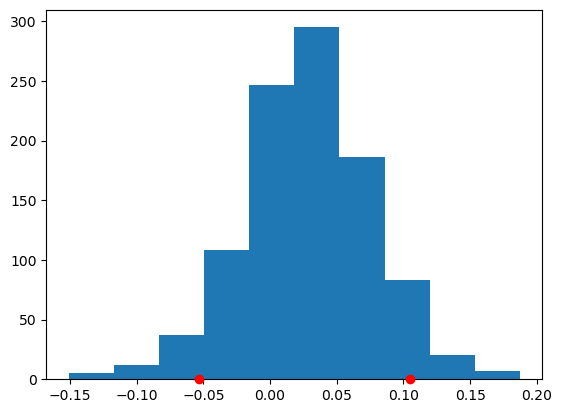

In [164]:
b1samples = [bootstrap() for i in range(1000)]
plt.hist(b1samples)
print(np.percentile(b1samples,[5,95]))
plt.scatter(np.percentile(b1samples,[5,95]),[0,0],zorder=3,clip_on=False,color="red")


## Q5 [15 Points]

Free points. Good luck with the rest of the semester!